In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [32]:
df=pd.read_csv(r"C:\Users\elham\Desktop\excel2\segmentation_data.csv")

In [33]:
df.head(2)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [35]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [36]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [37]:
df_cleaned=df.dropna()

In [38]:
df_cleaned=df.drop_duplicates(inplace=False)

In [9]:
#it did not work
df.columns.values[2]="Marital_status"


Index(['ID', 'Sex', 'Marital_status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [17]:
df.columns.values[7]="Settlement_size"
df.columns


Index(['ID', 'Sex', 'Marital_status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement_size'],
      dtype='object')

In [39]:
df.rename(columns={df.columns[7]: "Settlement_size",df.columns[2]:"Marital_status"}, inplace=True)


df.head(2)

,ID,Sex,Marital_status,Age,Education,Income,Occupation,Settlement_size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2


In [40]:
df['Marital_status']

0       0
1       1
2       0
3       0
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Marital_status, Length: 2000, dtype: int64

In [41]:
df['Marital_status'].value_counts()


Marital_status
0    1007
1     993
Name: count, dtype: int64

In [43]:
print(df['Marital_status'].dtypes)
print(df['Marital_status'].value_counts())

int64
Marital_status
0    1007
1     993
Name: count, dtype: int64


In [44]:
#married status
df[df['Marital_status']==1]

,ID,Sex,Marital_status,Age,Education,Income,Occupation,Settlement_size
1,100000002,1,1,22,1,150773,1,2
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0
10,100000011,1,1,25,1,108469,1,0
11,100000012,1,1,24,1,127596,1,0
...,...,...,...,...,...,...,...,...
1988,100001989,1,1,35,1,124447,0,0
1989,100001990,1,1,25,1,106567,0,0
1990,100001991,1,1,31,1,78758,0,0
1996,100001997,1,1,27,1,117744,1,0


In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()

,ID,Sex,Marital_status,Age,Education,Income,Occupation,Settlement_size
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [64]:
from sklearn.cluster import KMeans
model=KMeans(init="random",n_clusters=5);
model.fit(df_scaled);

C:\Users\elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [65]:
model.labels_

array([2, 4, 0, ..., 0, 3, 0])

In [66]:
model.cluster_centers_

array([[ 0.02293999, -0.91739884, -0.80771627, -0.0195015 , -0.53757335,
        -0.63395762, -0.81913767, -0.8271366 ],
       [-0.59005327, -0.91314579, -0.99302433,  0.09185098, -0.60749338,
         0.5509752 ,  0.69836573,  0.92116347],
       [-0.23715567,  0.06279515,  0.38200936,  1.699429  ,  1.83884264,
         0.98725861,  0.50485367,  0.4511332 ],
       [ 0.92557842,  0.97429431,  0.39439705, -0.36054499,  0.00573928,
        -0.65238558, -0.70225326, -0.87645849],
       [-0.44965159,  0.39936077,  1.00207406, -0.67376497, -0.04686059,
         0.11807979,  0.46353833,  0.48279446]])

In [67]:
model.inertia_

7871.806552846741

In [71]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming df_scaled is your preprocessed data
distortion = []
k = range(1, 28)

# Loop through different k values (from 1 to 27 clusters)
for i in k:
    model1 = KMeans(init="random", n_clusters=i)
    model1.fit(df_scaled)
    distortion.append(model1.inertia_)  # Use model1, not model




C:\Users\elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

TypeError: 'str' object is not callable

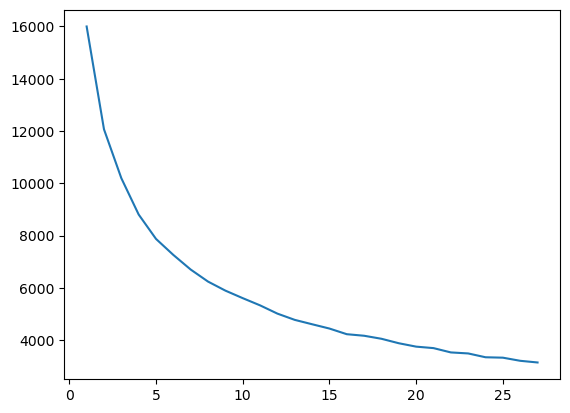

In [74]:
# Plotting the distortion (inertia) for each k value
plt.plot(k, distortion)
plt.xlabel("Number of clusters") 

plt.ylabel("Distortion")  # Corrected to use parentheses
plt.title("The Elbow Method Showing Optimal k")  # Corrected to use parentheses
plt.show()

C:\Users\elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\elham\anaconda3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


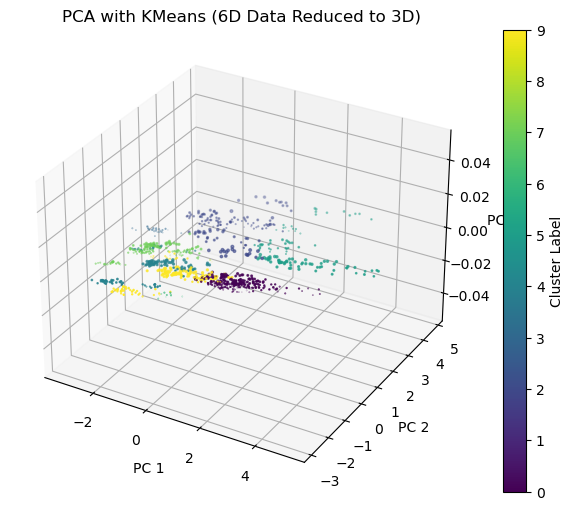

In [81]:
# Importing necessary libraries
from sklearn.decomposition import PCA  # Ensure PCA is imported

from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans
model2=KMeans(init="random",n_clusters=10)
model2.fit(df_scaled)




pca=PCA(n_components=3)
reduced_data=pca.fit_transform(df_scaled)


fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection='3d')
sc=plt.scatter(reduced_data[:,0],reduced_data[:,1],reduced_data[:,2],c=model2.labels_,cmap='viridis')
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.set_title("PCA with KMeans (6D Data Reduced to 3D)")

plt.colorbar(sc,label="Cluster Label")


plt.show()
